In [376]:

import numpy as np # linear algebra
import pandas as pd # data processing

/kaggle/input/municipalitybusutilization/municipality_bus_utilization.csv


In [377]:
# Reading the data
data_path = "../input/municipalitybusutilization/municipality_bus_utilization.csv"
df = pd.read_csv(data_path)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head(40)

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
5,2017-06-04 07:59:42,5,70,587
6,2017-06-04 07:59:42,2,273,697
7,2017-06-04 07:59:42,1,129,397
8,2017-06-04 07:59:42,6,597,3113
9,2017-06-04 07:59:42,3,623,1930


In [378]:
df.describe()

,municipality_id,usage,total_capacity
count,13070.000000,13070.000000,13070.000000
mean,4.500000,876.002984,1972.800000
std,2.872391,679.287109,1144.074782
min,0.000000,11.000000,397.000000
25%,2.000000,403.000000,697.000000
50%,4.500000,692.000000,1974.500000
75%,7.000000,1190.000000,2947.000000
max,9.000000,3508.000000,3893.000000


In [379]:
# We drop the "total_capacity" column since it does not change throughout the entire data set and doesn't provide any usefull information
df = df.drop("total_capacity",axis="columns")
df.head()

,timestamp,municipality_id,usage
0,2017-06-04 07:59:42,9,454
1,2017-06-04 07:59:42,8,556
2,2017-06-04 07:59:42,4,1090
3,2017-06-04 07:59:42,0,204
4,2017-06-04 07:59:42,7,718


In [380]:
# Creating new hot encodded columns for each municipality
df_one_hot = pd.get_dummies(df, columns = ["municipality_id"], prefix = ["municipality"])
df_one_hot.head()

,timestamp,usage,municipality_0,municipality_1,municipality_2,municipality_3,municipality_4,municipality_5,municipality_6,municipality_7,municipality_8,municipality_9
0,2017-06-04 07:59:42,454,0,0,0,0,0,0,0,0,0,1
1,2017-06-04 07:59:42,556,0,0,0,0,0,0,0,0,1,0
2,2017-06-04 07:59:42,1090,0,0,0,0,1,0,0,0,0,0
3,2017-06-04 07:59:42,204,1,0,0,0,0,0,0,0,0,0
4,2017-06-04 07:59:42,718,0,0,0,0,0,0,0,1,0,0


In [381]:
# Appending usage values of all municipalities to their own columns
df_one_dumy = df_one_hot.copy()
df_one_dumy["municipality_0"] = df_one_dumy["municipality_0"]*df_one_dumy["usage"]
df_one_dumy["municipality_1"] = df_one_dumy["municipality_1"]*df_one_dumy["usage"]
df_one_dumy["municipality_2"] = df_one_dumy["municipality_2"]*df_one_dumy["usage"]
df_one_dumy["municipality_3"] = df_one_dumy["municipality_3"]*df_one_dumy["usage"]
df_one_dumy["municipality_4"] = df_one_dumy["municipality_4"]*df_one_dumy["usage"]
df_one_dumy["municipality_5"] = df_one_dumy["municipality_5"]*df_one_dumy["usage"]
df_one_dumy["municipality_6"] = df_one_dumy["municipality_6"]*df_one_dumy["usage"]
df_one_dumy["municipality_7"] = df_one_dumy["municipality_7"]*df_one_dumy["usage"]
df_one_dumy["municipality_8"] = df_one_dumy["municipality_8"]*df_one_dumy["usage"]
df_one_dumy["municipality_9"] = df_one_dumy["municipality_9"]*df_one_dumy["usage"]
df_one_dumy

,timestamp,usage,municipality_0,municipality_1,municipality_2,municipality_3,municipality_4,municipality_5,municipality_6,municipality_7,municipality_8,municipality_9
0,2017-06-04 07:59:42,454,0,0,0,0,0,0,0,0,0,454
1,2017-06-04 07:59:42,556,0,0,0,0,0,0,0,0,556,0
2,2017-06-04 07:59:42,1090,0,0,0,0,1090,0,0,0,0,0
3,2017-06-04 07:59:42,204,204,0,0,0,0,0,0,0,0,0
4,2017-06-04 07:59:42,718,0,0,0,0,0,0,0,718,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13065,2017-08-19 16:30:35,548,0,0,548,0,0,0,0,0,0,0
13066,2017-08-19 16:30:35,1193,0,0,0,0,0,0,0,0,1193,0
13067,2017-08-19 16:30:35,1354,0,0,0,0,0,0,0,1354,0,0
13068,2017-08-19 16:30:35,1680,0,0,0,0,0,0,1680,0,0,0


In [382]:
# Combining the rows with same timestamp to a single row 
df_one_dumy = df_one_dumy.groupby(['timestamp']).sum()
df_one_dumy = df_one_dumy.drop("usage",axis="columns")
df_one_dumy.reset_index(inplace=True)
df_one_dumy

,timestamp,municipality_0,municipality_1,municipality_2,municipality_3,municipality_4,municipality_5,municipality_6,municipality_7,municipality_8,municipality_9
0,2017-06-04 07:59:42,204,129,273,623,1090,70,597,718,556,454
1,2017-06-04 08:25:42,247,138,311,770,1476,73,687,789,674,487
2,2017-06-04 08:59:42,332,164,355,967,2016,89,801,873,857,527
3,2017-06-04 09:32:46,429,213,423,1130,2511,116,941,1013,1045,599
4,2017-06-04 09:59:48,485,245,494,1263,2811,159,1061,1151,1172,666
...,...,...,...,...,...,...,...,...,...,...,...
1304,2017-08-19 14:30:33,1285,410,677,1526,3176,318,1849,1651,1341,983
1305,2017-08-19 15:03:34,1283,408,651,1496,3111,309,1829,1618,1336,976
1306,2017-08-19 15:29:33,1286,411,617,1441,2980,283,1790,1562,1315,954
1307,2017-08-19 16:03:35,1276,401,580,1330,2779,239,1727,1450,1253,879


In [383]:
# Picking the indexes to drop
df2=df_one_dumy.copy()
index_to_drop=[]
for i in range(len(df2)-1):
        if df2["timestamp"].dt.hour[i] == df2["timestamp"].dt.hour[i+1]:
            index_to_drop.append(i)
        else:
             pass

In [384]:
#index_to_drop

In [385]:
# Droping min values of same hour of the same date for each municipality
df_dropped = df2.copy()
df_dropped = df_dropped.drop(index = index_to_drop)
df_dropped = df_dropped.set_index("timestamp")
df_dropped

,municipality_0,municipality_1,municipality_2,municipality_3,municipality_4,municipality_5,municipality_6,municipality_7,municipality_8,municipality_9
timestamp,,,,,,,,,,
2017-06-04 07:59:42,204,129,273,623,1090,70,597,718,556,454
2017-06-04 08:59:42,332,164,355,967,2016,89,801,873,857,527
2017-06-04 09:59:48,485,245,494,1263,2811,159,1061,1151,1172,666
2017-06-04 10:59:48,583,317,582,1396,3178,228,1219,1373,1363,800
2017-06-04 11:59:44,614,341,643,1456,3257,268,1297,1479,1399,845
...,...,...,...,...,...,...,...,...,...,...
2017-08-19 12:30:32,1281,406,663,1484,3157,258,1787,1503,1251,849
2017-08-19 13:30:35,1283,408,695,1519,3188,300,1845,1627,1315,941
2017-08-19 14:30:33,1285,410,677,1526,3176,318,1849,1651,1341,983


In [386]:
# Making a dumy dataframe for plotting
municipality = "municipality_0"
df_plt = df_dropped.reset_index()[municipality]

In [387]:
#df_plt.shape

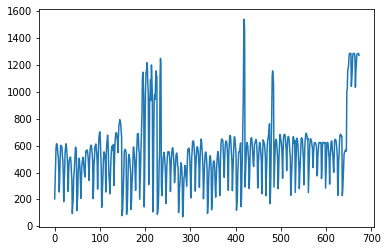

In [388]:
# Plotting the bus usage chart for the selected municipality
import matplotlib.pyplot as plt
plt.plot(df_plt)

In [389]:
# Splitting train and test sets
df_train = df_dropped.iloc[:540,0]
df_test = df_dropped.iloc[541:,0]

In [390]:
# Normalize train and test sets
from sklearn.preprocessing import MinMaxScaler
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
df_train = scaler.fit_transform(np.array(df_train).reshape(-1, 1))
df_test = scaler.fit_transform(np.array(df_test).reshape(-1, 1))

In [391]:
# Scaling the dumy dataframe for plot as well
scaler = MinMaxScaler(feature_range=(0, 1))
df_plt = scaler.fit_transform(np.array(df_plt).reshape(-1, 1))

In [392]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY  = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [393]:
# Creating time series data sets
look_back = 10
X_train, y_train = create_dataset(df_train, look_back)
X_test, y_test = create_dataset(df_test, look_back)

In [394]:
#X_train.shape
#y_train.shape

In [395]:
# Reshape input to be [samples, time_steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Epoch 1/400
8/8 - 4s - loss: 0.0759 - val_loss: 0.1034
Epoch 2/400
8/8 - 0s - loss: 0.0234 - val_loss: 0.0387
Epoch 3/400
8/8 - 0s - loss: 0.0235 - val_loss: 0.0583
Epoch 4/400
8/8 - 0s - loss: 0.0210 - val_loss: 0.0661
Epoch 5/400
8/8 - 0s - loss: 0.0200 - val_loss: 0.0515
Epoch 6/400
8/8 - 0s - loss: 0.0199 - val_loss: 0.0508
Epoch 7/400
8/8 - 0s - loss: 0.0197 - val_loss: 0.0559
Epoch 8/400
8/8 - 0s - loss: 0.0195 - val_loss: 0.0527
Epoch 9/400
8/8 - 0s - loss: 0.0194 - val_loss: 0.0503
Epoch 10/400
8/8 - 0s - loss: 0.0194 - val_loss: 0.0512
Epoch 11/400
8/8 - 0s - loss: 0.0193 - val_loss: 0.0499
Epoch 12/400
8/8 - 0s - loss: 0.0192 - val_loss: 0.0485
Epoch 13/400
8/8 - 0s - loss: 0.0192 - val_loss: 0.0481
Epoch 14/400
8/8 - 0s - loss: 0.0191 - val_loss: 0.0470
Epoch 15/400
8/8 - 0s - loss: 0.0190 - val_loss: 0.0462
Epoch 16/400
8/8 - 0s - loss: 0.0189 - val_loss: 0.0455
Epoch 17/400
8/8 - 0s - loss: 0.0188 - val_loss: 0.0447
Epoch 18/400
8/8 - 0s - loss: 0.0187 - val_loss: 0.0442
E

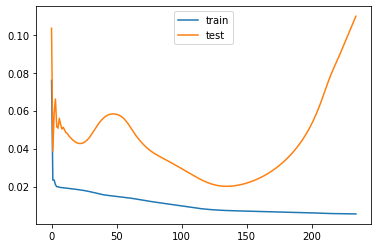

In [396]:
### Creating a Stacked LSTM model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

n_neurons = 30
learning_rate = 0.001
lr_decay = 1e-6
batch_size = 72
epochs = 400

# Defining a Stacked LSTM model
model=Sequential()
model.add(LSTM(n_neurons,return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(n_neurons,return_sequences=True))
model.add(LSTM(n_neurons))
model.add(Dense(1))

# Defining an early stopping callback to prevent overfitting and preserve the best weights
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping
    restore_best_weights=True
)

# Defining the optimizer
opt = keras.optimizers.Adam(lr=learning_rate, decay=lr_decay)
model.compile(loss='mean_squared_error', optimizer=opt)

# Fit network
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test, y_test), 
                    verbose=2,
                    callbacks=[early_stopping],
                    shuffle=False # we need the data in the correct order
                   )

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [397]:
## Early stopping stopped the training process and picked the optimum weights

In [398]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [399]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [400]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

546.2934308237309

In [401]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

702.8876312865589

In [402]:
## The results are pretty close to each other and it looks like the model performing pretty impressing

In [403]:
# Demonstrate prediction for next week
x_input=df_test[len(df_test) - look_back:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>look_back):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,look_back, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, look_back,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.79120755]
11
1 day input [0.76203966 0.87063267 0.91690274 0.9924457  0.99527856 0.99716714
 0.99905571 1.         0.98583569 0.79120755]
1 day output [[0.6708374]]
2 day input [0.87063267 0.91690274 0.9924457  0.99527856 0.99716714 0.99905571
 1.         0.98583569 0.79120755 0.6708374 ]
2 day output [[0.6393615]]
3 day input [0.91690274 0.9924457  0.99527856 0.99716714 0.99905571 1.
 0.98583569 0.79120755 0.6708374  0.6393615 ]
3 day output [[0.65682614]]
4 day input [0.9924457  0.99527856 0.99716714 0.99905571 1.         0.98583569
 0.79120755 0.6708374  0.6393615  0.65682614]
4 day output [[0.6886676]]
5 day input [0.99527856 0.99716714 0.99905571 1.         0.98583569 0.79120755
 0.6708374  0.6393615  0.65682614 0.6886676 ]
5 day output [[0.7126834]]
6 day input [0.99716714 0.99905571 1.         0.98583569 0.79120755 0.6708374
 0.6393615  0.65682614 0.6886676  0.71268338]
6 day output [[0.7256599]]
[[0.7912075519561768], [0.67083740234375], [0.6393615007400513], [0.656826138496

In [404]:
# Predictions for the next week
result = scaler.inverse_transform(lst_output)
result

array([[1233.07510138],
       [1056.13098145],
       [1009.86140609],
       [1035.53442359],
       [1082.34136522],
       [1117.64456809],
       [1136.72006309]])

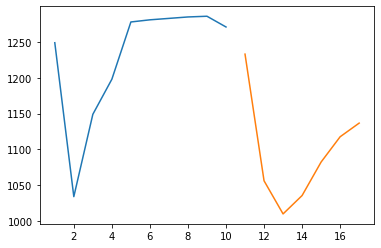

In [405]:
# Plotting the prediction for the next week
day_new = np.arange(1,look_back + 1)
day_pred = np.arange(look_back + 1,look_back + 8)

plt.plot(day_new,scaler.inverse_transform(df_plt[len(df_plt)-look_back:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [406]:
## The blue line is the data frame and the orange line is the estimate. The prediction looks pretty consistent
